## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn, Plotly and Warings Library.

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
from typing import List
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Krish_naik\End_To_End_Student_Marks_prediction\Notebook\data\raw.csv')
df.shape

(1000, 8)

In [3]:
pd.concat([df.head(3), df.sample(3), df.tail(3)]) 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
446,male,group D,some college,free/reduced,none,69,66,60
418,male,group D,some college,standard,none,68,59,62
408,female,group D,high school,free/reduced,completed,52,57,56
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
for i, col in enumerate(df.select_dtypes(exclude=np.number).columns.to_list()):
    print(f"{i+1}. {col} column: {df[col].unique()}")
    print()

1. gender column: ['female' 'male']

2. race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']

3. parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

4. lunch column: ['standard' 'free/reduced']

5. test_preparation_course column: ['none' 'completed']



In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print(f"Numerical Cols : {numerical_cols}")
print(f"Categorical Cols : {categorical_cols}")

Numerical Cols : ['math_score', 'reading_score', 'writing_score']
Categorical Cols : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
df['total_score'] = df.math_score+df.reading_score+df.writing_score
df['avg_score'] = round(df.total_score/3, 2)

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [18]:
def numOfFullMarks(df: DataFrame, subject:str)-> None:
    print(f"Number of people got full marks in {subject.split('_')[0]} : {df[df[subject]==100].shape[0]}")

In [19]:
numOfFullMarks(df, 'math_score')
numOfFullMarks(df, 'writing_score')
numOfFullMarks(df, 'reading_score')

Number of people got full marks in math : 7
Number of people got full marks in writing : 14
Number of people got full marks in reading : 17


In [21]:
print(f"Number of student got less than 20 marks in math: {df[df['math_score']<20].shape[0]}")
print(f"Number of student got less than 20 marks in writing: {df[df['writing_score']<20].shape[0]}")
print(f"Number of student got less than 20 marks in reading: {df[df['reading_score']<20].shape[0]}")

Number of student got less than 20 marks in math: 4
Number of student got less than 20 marks in writing: 3
Number of student got less than 20 marks in reading: 1


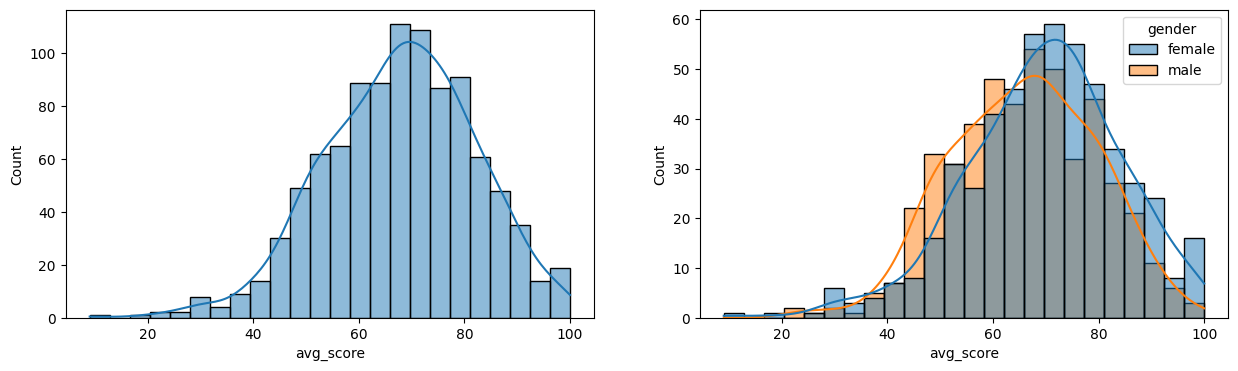

In [22]:
fig, axs = plt.subplots(1,2,figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='avg_score', hue='gender', kde=True)
plt.show()

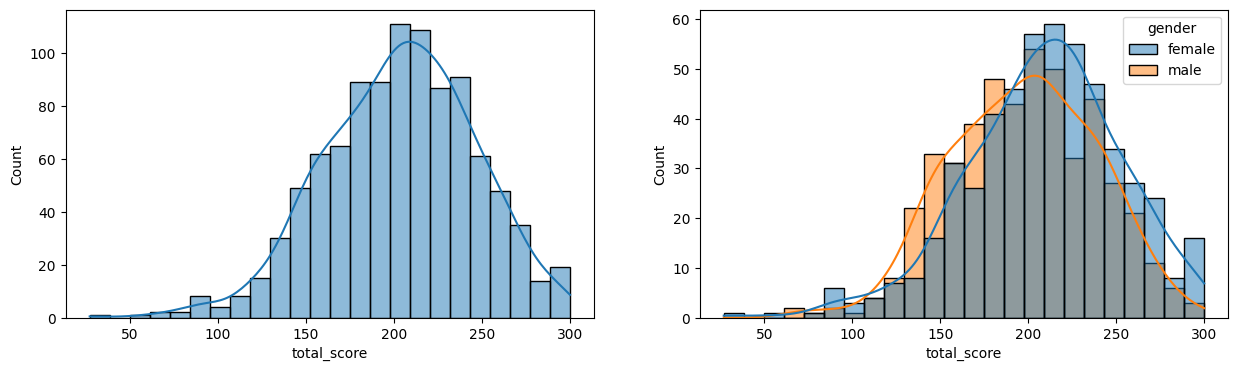

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,4))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='total_score', hue='gender', kde=True)
plt.show()

In [42]:
def get_histplot_avg_gender_hue(df: DataFrame, hue:str)->None:
    fig, axs = plt.subplots(1,3,figsize=(15, 7))
    fig.suptitle(f"{hue.capitalize()}")
    # fig.tight_layout()
    plt.subplot(131)
    sns.histplot(data=df, x="avg_score", hue=hue, kde=True).set_title("Both")
    plt.subplot(132)
    sns.histplot(data=df[df['gender']=='female'], x='avg_score', hue=hue, kde=True).set_title("Male")
    plt.subplot(133)
    sns.histplot(data=df[df['gender']=='male'], x='avg_score', hue=hue, kde=True).set_title("Female")
    plt.show()

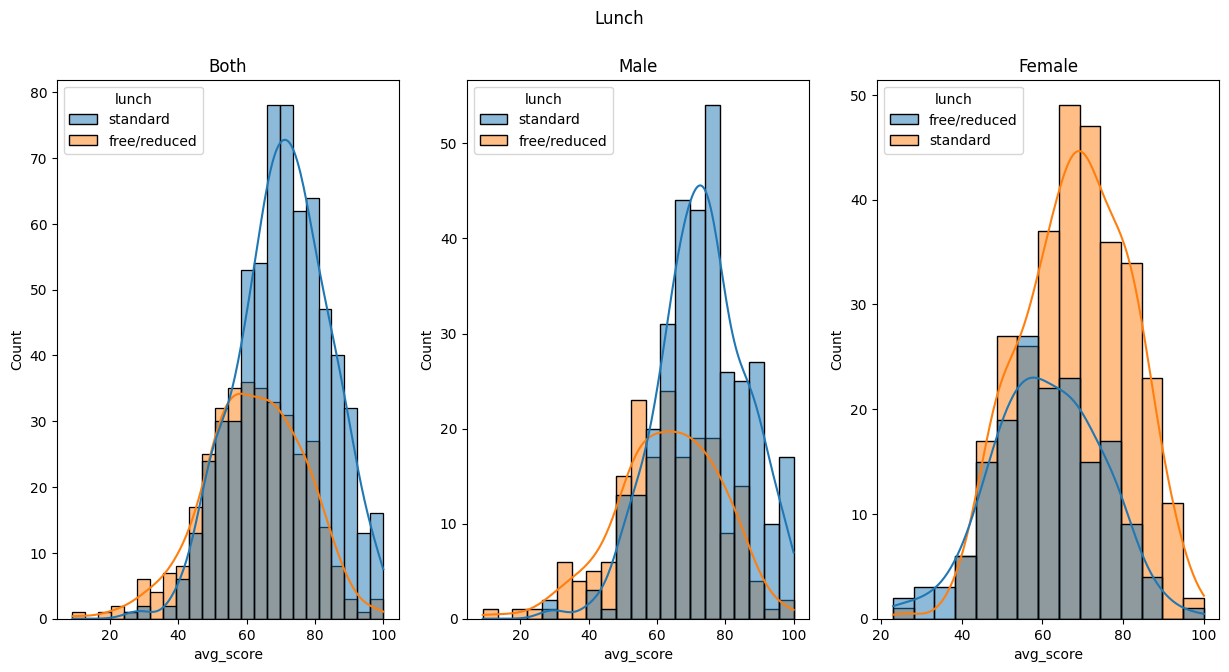

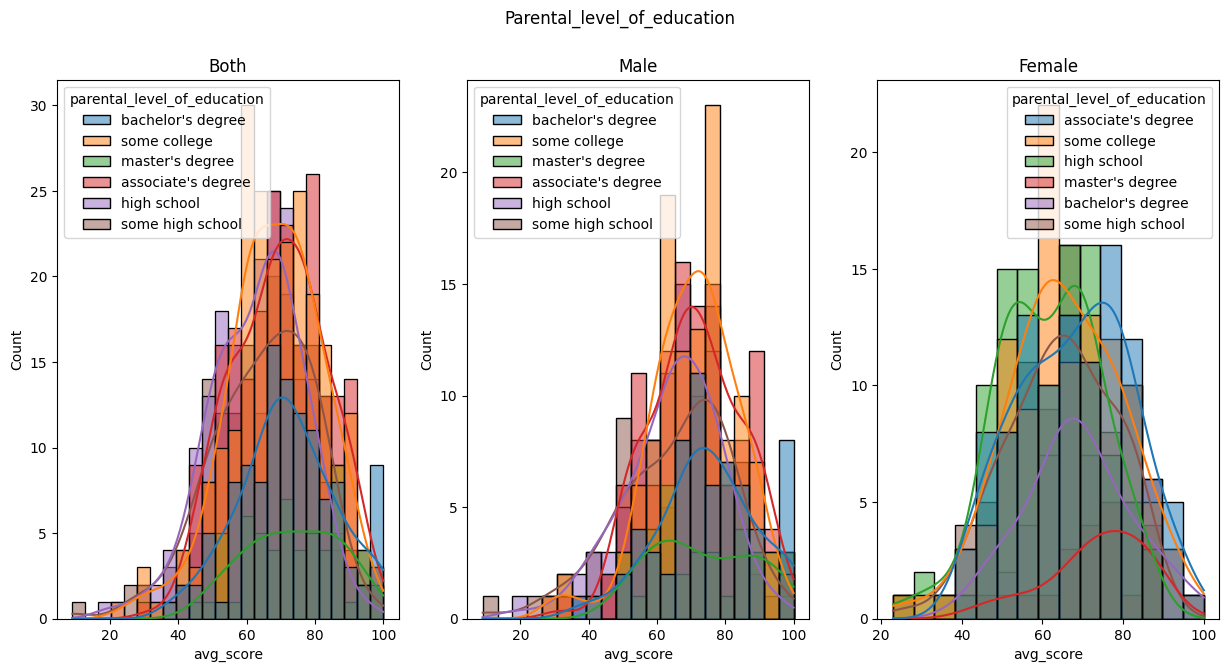

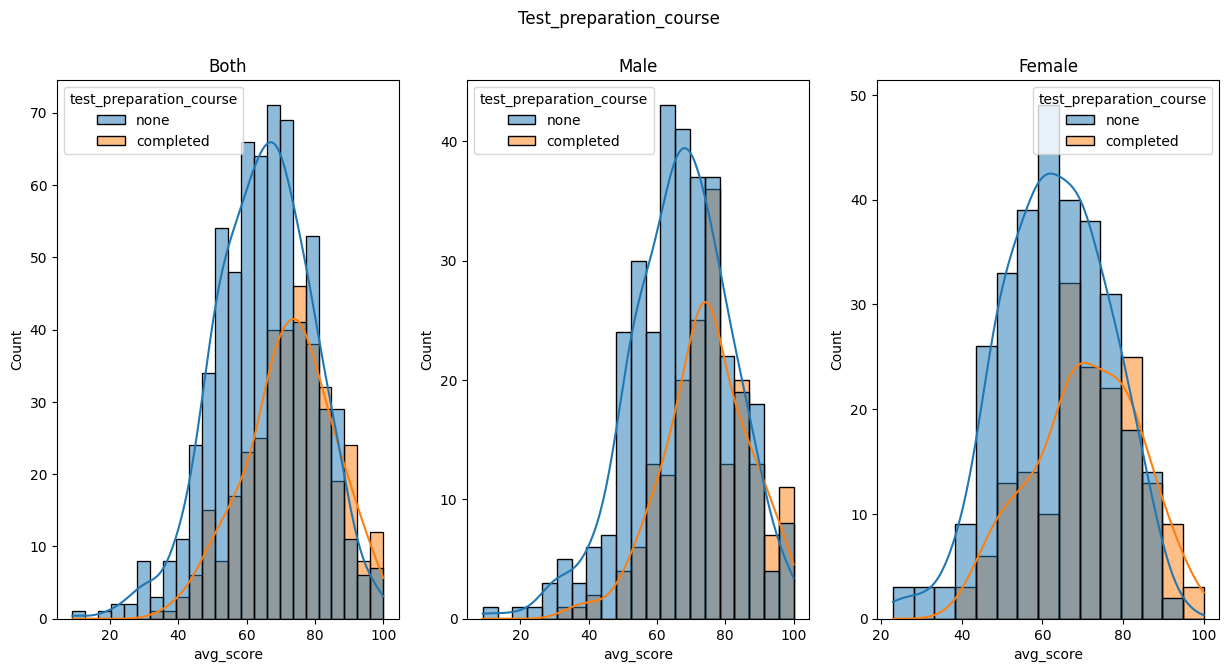

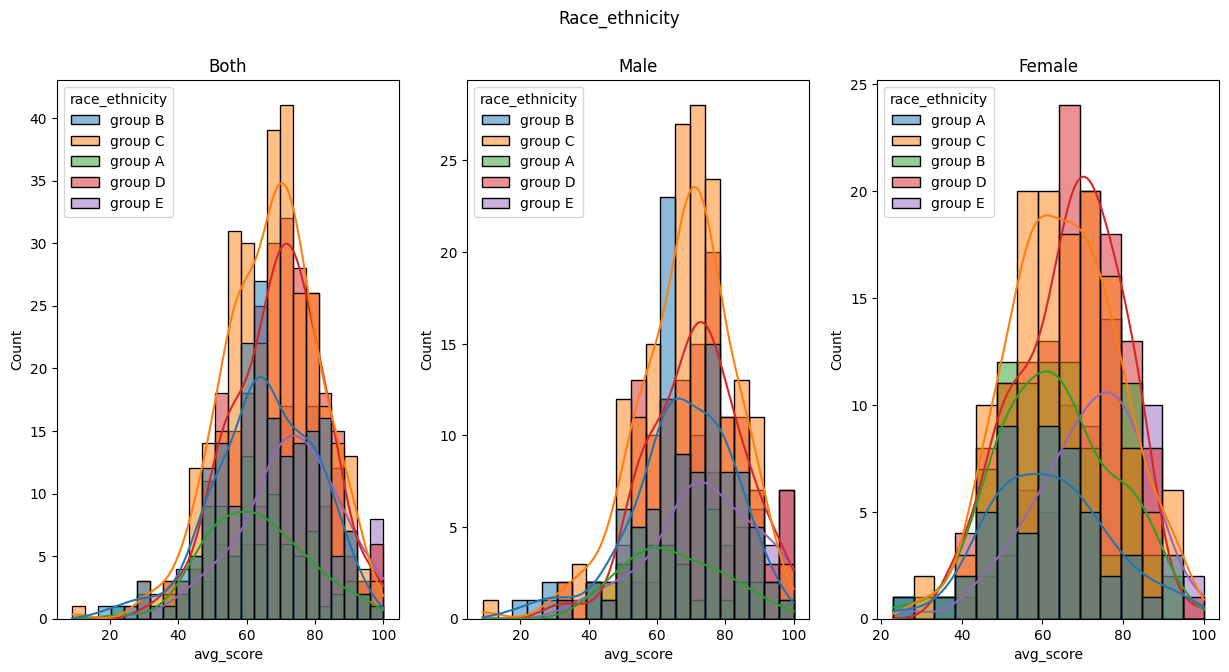

In [43]:
get_histplot_avg_gender_hue(df, hue="lunch")
get_histplot_avg_gender_hue(df, hue='parental_level_of_education')
get_histplot_avg_gender_hue(df, hue='test_preparation_course')
get_histplot_avg_gender_hue(df, hue='race_ethnicity')


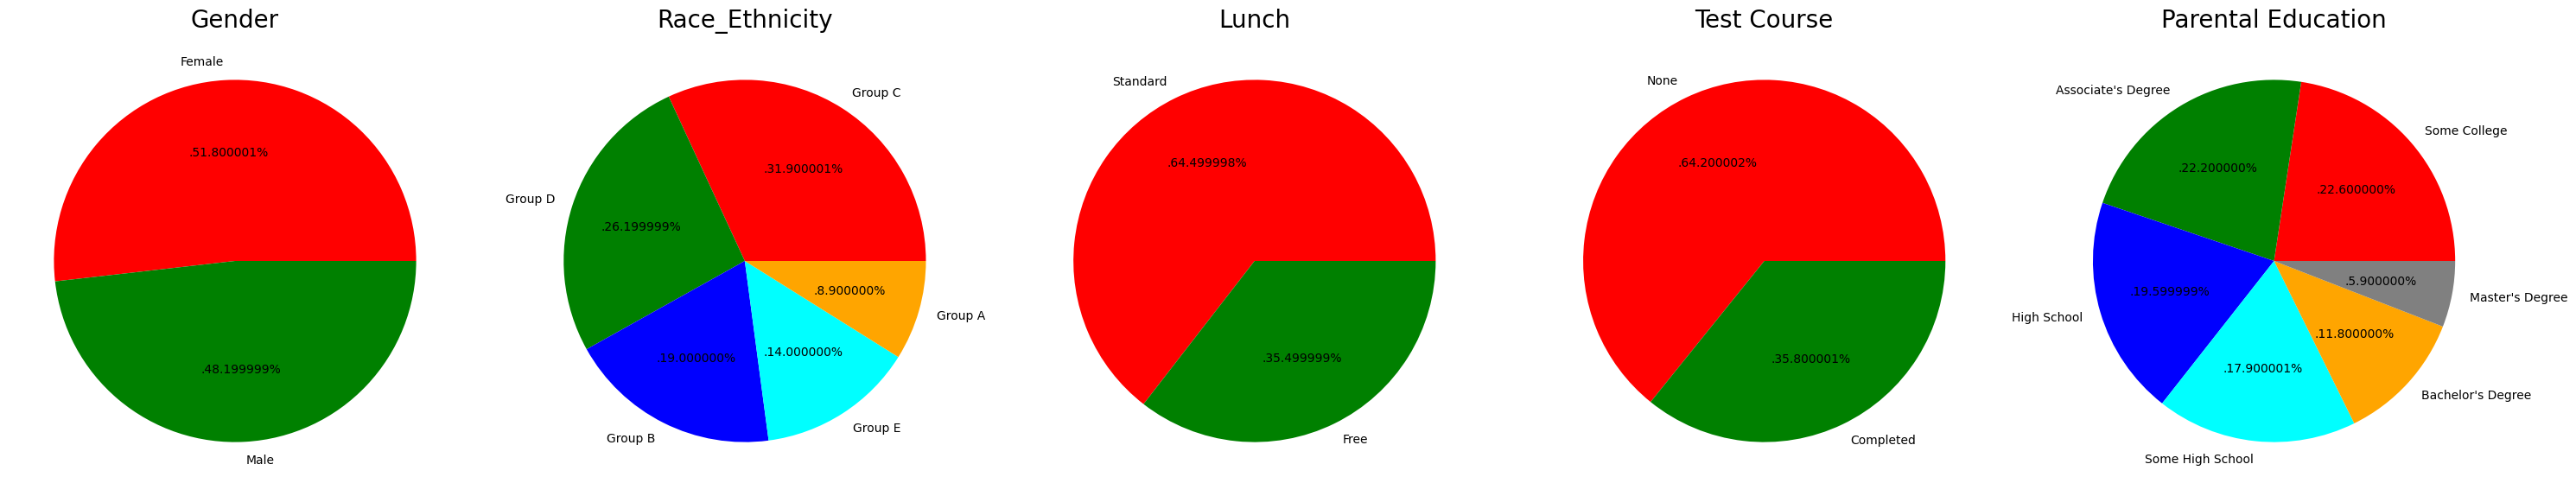

In [47]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()